# 課題4: サッカーの試合における結果の予測

過去の試合データを使って、試合の結果を予測します。

レッスン9で学んだ内容を踏まえ、各セルに入っているコメントを実行するコードを記入してください。

## 1. 必要なモジュールの読み込み

In [25]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

## 2. データの読み込み

データはdatasetフォルダ直下にある"J1_data.csv"を使用します。

このデータセットはFootball-Data.co.jp (http://www.football-data.co.uk/japan.php) から引用したものを加工しています。

In [26]:
# データを読み込んで変数 data に格納
data = pd.read_csv('dataset/J1_data.csv')

In [27]:
# データの最初の5行だけ表示
data.head()

,Home,Away,Home_Goals,Away_Goals
0,G-Osaka,Kobe,2,3
1,Hiroshima,Urawa,1,0
2,Nagoya,Shimizu,1,0
3,Sagan Tosu,C-Osaka,0,0
4,Sapporo,Iwata,0,0


In [28]:
# Homeチームのゴール数の平均と, Awayチームのゴール数の平均を計算して表示
# Homeチームのゴール平均
me_home = np.mean(data['Home_Goals'])

# Awayチームのゴール平均
me_away = np.mean(data['Away_Goals'])

#各平均
print('me_home:', me_home)
print('me_away:', me_away)

me_home: 1.4177570093457943
me_away: 1.253271028037383


## 3. データ概要の把握

先ほどの「ゴールの平均」を見ると、どうやらHomeチームとAwayチームで得点に差がありそうです。ヒストグラムを作図して詳細を確認してみましょう。

(array([24., 35.,  0., 43.,  0.,  9.,  6.,  0.,  0.,  3.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

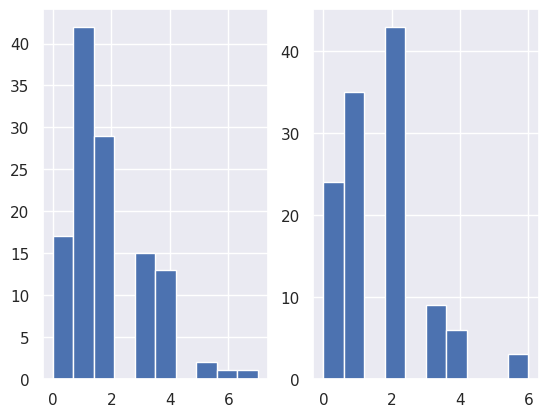

In [29]:
# プロットエリアを2つに分け、Urawaに関して「Homeで試合をしたときの得点のヒストグラム」と「Awayで試合をしたときの得点のヒストグラム」を表示
# なお、ヒストグラムの表示には Matplotlib の hist を使い、figureで2つのグラフを「並べて」表示すること。
# ※ histの詳細： https://matplotlib.org/2.2.2/api/_as_gen/matplotlib.pyplot.hist.html
y1 = data.query('Home == "Urawa"')['Home_Goals']
y2 = data.query('Away == "Urawa"')['Away_Goals']

fig = plt.figure()

u_home = fig.add_subplot(1, 2, 1)
u_home.hist(y1)

u_away = fig.add_subplot(1, 2, 2)
u_away.hist(y2)

(array([26.,  0., 38.,  0., 25.,  0.,  9.,  0.,  3.,  1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

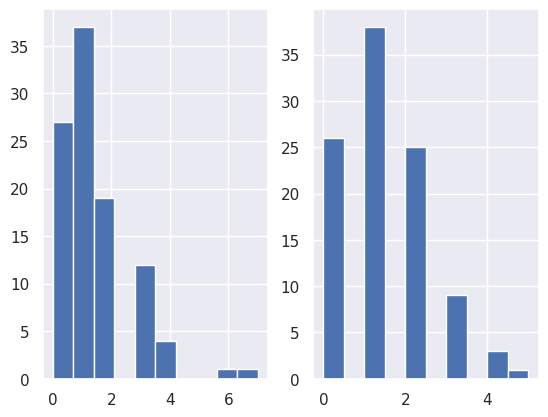

In [30]:
# もう1つ、どこか違うチームをピックアップして、同様に
# 「Homeで試合をしたときの得点のヒストグラム」と「Awayで試合をしたときの得点のヒストグラム」を表示
y1 = data.query('Home == "Kobe"')['Home_Goals']
y2 = data.query('Away == "Kobe"')['Away_Goals']

fig = plt.figure()

k_home = fig.add_subplot(1, 2, 1)
k_home.hist(y1)

k_away = fig.add_subplot(1, 2, 2)
k_away.hist(y2)

## 4. モデルの作成

ここでは、応答変数をHome_Goalsとして、2通りのモデルを作成し、AICを確認してみましょう。

In [31]:
# 説明変数：Away_Goals、HomeとAwayを指定し、ゴール数の予測に適切な確率分布で一般化線形モデルを構築し、AICを算出
model_1 = smf.glm('Home_Goals ~ Away_Goals+Home+Away', data=data, family=sm.families.Poisson()).fit()
print('Model_1:',model_1.aic.round(3))

Model_1: 6448.858


In [32]:
# 説明変数：HomeとAway_Goalsを指定し、ゴール数の予測に適切な確率分布で一般化線形モデルを構築し、AICを算出
model_2 = smf.glm('Home_Goals ~ Home+Away_Goals', data=data, family=sm.families.Poisson()).fit()
print('Model_2:',model_2.aic.round(3))

Model_2: 6472.639


In [33]:
# 上記2つのモデルを比較し、選択すべき最適なモデルについて詳細を表示
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Home_Goals   No. Observations:                 2140
Model:                            GLM   Df Residuals:                     2087
Model Family:                 Poisson   Df Model:                           52
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3171.4
Date:                Wed, 01 Mar 2023   Deviance:                       2433.7
Time:                        12:55:55   Pearson chi2:                 2.13e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0668      0.132     -0.505      0.614      -0.326       0.193
Home[T.Avispa Fukuoka]       -0.0592      0.269     -0.220      0.826      -0.587       0.469
Home[T.C-Osaka]               0.4320      0.133      3.252      0.001       0.172       0.692
Home[T.FC Tokyo]              0.4069      0.125      3.256      0.001       0.162       0.652
Home[T.G-Osaka]               0.5258      0.126      4.182      0.000       0.279       0.772
Home[T.Hiroshima]             0.4595      0.124      3.716      0.000       0.217       0.702
Home[T.Iwata]                 0.3488      0.135      2.579      0.010       0.084       0.614
Home[T.Kashima]               0.4952      0.123      4.020      0.000       0.254       0.737
Home[T.Kashiwa]               0.4445      0.124      3.581      0.000       0.201       0.688
Home[T.Kawasaki Frontale]     0.7168      0.119      6.041      0.000       0.484       0.949
Home[T.Kobe]                  0.3414      0.131      2.611      0.009       0.085       0.598
Home[T.Kofu]                 -0.1905      0.156     -1.218      0.223      -0.497       0.116
Home[T.Montedio Yamagata]    -0.1853      0.286     -0.649      0.517      -0.745       0.375
Home[T.Nagoya]                0.3949      0.129      3.055      0.002       0.142       0.648
Home[T.Oita]                 -0.1822      0.286     -0.638      0.523      -0.742       0.377
Home[T.Omiya Ardija]          0.1612      0.142      1.138      0.255      -0.116       0.439
Home[T.Sagan Tosu]            0.2572      0.129      1.994      0.046       0.004       0.510
Home[T.Sapporo]               0.2288      0.162      1.408      0.159      -0.090       0.547
Home[T.Shimizu]               0.2962      0.131      2.257      0.024       0.039       0.554
Home[T.Shonan]               -0.0340      0.159     -0.213      0.831      -0.346       0.278
Home[T.Tokushima]            -1.2166      0.458     -2.654      0.008      -2.115      -0.318
Home[T.Urawa]                 0.6208      0.120      5.155      0.000       0.385       0.857
Home[T.V-Varen Nagasaki]      0.1154      0.256      0.450      0.652      -0.387       0.617
Home[T.Vegalta Sendai]        0.4373      0.124      3.526      0.000       0.194       0.680
Home[T.Yamaga]                0.1723      0.245      0.702      0.482      -0.308       0.653
Home[T.Yokohama M.]           0.3622      0.126      2.875      0.004       0.115       0.609
Away[T.Avispa Fukuoka]        0.3390      0.193      1.755      0.079      -0.040       0.718
Away[T.C-Osaka]              -0.0896      0.127     -0.707      0.480      -0.338       0.159
Away[T.FC Tokyo]             -0.1706      0.119     -1.437      0.151      -0.403       0.062
Away[T.G-Osaka]              -0.0014      0.117     -0.012      0.991      

In [34]:
# Home: Urawa, Away: KashimaでAwayのチームが0得点だった場合のHomeの得点を予測
# なお、予測した得点は変数 pred1 に格納し、pred1の得点だけ（ pred1[0] ）を表示すること。
sample_1 = pd.DataFrame({'Away_Goals':0, 'Home':'Urawa', 'Away':'Kashima'}, index=[0])
pred1 = model_1.predict(sample_1)
pred1[0]

1.5753250551853537

In [35]:
# Home: Urawa, Away: KashimaでAwayのチームが2得点だった場合のHomeの得点を予測
# なお、予測した得点は変数 pred2 に格納し、pred2の得点だけ（ pred2[0] ）を表示すること。
sample_2 = pd.DataFrame({'Away_Goals':2, 'Home':'Urawa', 'Away':'Kashima'}, index=[0])
pred2 = model_1.predict(sample_2)
pred2[0]

1.7301290921170647

## 5. シミュレーション

ここまでの内容で、Homeの点数を予測するモデルが作成できました。
しかし、このままでは「複数回の試合を行った際に、どのチームの勝率が高くなるか」を明言できません。


そのため、前章で作成したモデルを用い、複数回の試合をシミュレーションし、勝率を計算してみましょう。

試合をするチームは、引き続き **HomeがUrawa、KashimaがAway**の場合を想定します。

Awayの得点は、Awayの得点の平均をlambda（λ：強度）とするポアソン分布に従うことがわかっています。

このことを利用し、ポアソン分布から乱数を発生させ、Awayの得点を求めましょう。

そして、Awayの得点を用いて、Homeの得点を予測してみましょう。

In [36]:
# 今回はKashimaがAwayですので、Kashimaの　Awayでの得点平均を計算
y3 = data.query('Away == "Kashima"')['Away_Goals']
me_away_kashima = np.mean(y3)
print(me_away_kashima)
# 上記で求めた平均=lambda(強度：λ)としたポアソン分布から乱数を100個発生させる。np.random.poisson()を使うこと。
np.random.seed(1)
rvs_poisson = np.random.poisson(lam=me_away_kashima, size=100)
print(rvs_poisson)
# 参考：https://techacademy.jp/my/datascience/data-science3/simulation#chapter-5

1.6363636363636365
[2 1 0 0 1 2 1 0 2 0 1 3 1 0 0 1 3 2 0 3 1 2 1 0 1 1 0 1 2 2 0 2 3 0 2 3 3
 2 3 3 2 0 2 3 0 3 0 2 4 0 0 0 2 2 1 2 1 4 0 0 0 0 0 1 1 0 2 1 1 3 2 0 0 2
 2 2 1 0 2 1 2 3 0 4 1 5 2 4 0 0 1 2 0 1 3 4 2 1 3 2]


In [50]:
#「Awayの得点」と「4. モデルの作成 で選択した最適なモデル」を使用し、Homeの得点を予測
# 仕様1：今回はAwayの得点が100個あるため、forなどの繰り返しにより 100回の予測を行うこと
# 仕様2：予測した100個のHomeの得点をリストに格納すること（次セルで勝率の算出に使用するため）
score_home = []

for a in rvs_poisson:
    sample_3 = pd.DataFrame({'Away_Goals':a, 'Home':'Urawa', 'Away':'Kashima'}, index=[0])
    pred_home = model_1.predict(sample_3)
    score_home.append(pred_home[0])
print(score_home)

[1.7301290921170647, 1.6509135978351808, 1.5753250551853537, 1.5753250551853537, 1.6509135978351808, 1.7301290921170647, 1.6509135978351808, 1.5753250551853537, 1.7301290921170647, 1.5753250551853537, 1.6509135978351808, 1.8131455694077214, 1.6509135978351808, 1.5753250551853537, 1.5753250551853537, 1.6509135978351808, 1.8131455694077214, 1.7301290921170647, 1.5753250551853537, 1.8131455694077214, 1.6509135978351808, 1.7301290921170647, 1.6509135978351808, 1.5753250551853537, 1.6509135978351808, 1.6509135978351808, 1.5753250551853537, 1.6509135978351808, 1.7301290921170647, 1.7301290921170647, 1.5753250551853537, 1.7301290921170647, 1.8131455694077214, 1.5753250551853537, 1.7301290921170647, 1.8131455694077214, 1.8131455694077214, 1.7301290921170647, 1.8131455694077214, 1.8131455694077214, 1.7301290921170647, 1.5753250551853537, 1.7301290921170647, 1.8131455694077214, 1.5753250551853537, 1.8131455694077214, 1.5753250551853537, 1.7301290921170647, 1.9001454116005412, 1.5753250551853537,

In [53]:
# これまでのセルで求めた「Homeの得点」と「Awayの得点」を使用し、Urawaが勝つ確率 を表示
# HomeとAwayの得点を比較し、Homeの得点が上回っているデータの個数から、確率を計算すること
vic = 0
for i in range(100):
    if score_home[i] > rvs_poisson[i]:
        vic += 1
            
print("Urawaが勝つ確率:", vic1, "%")

Urawaが勝つ確率: 53 %
